
# Generate Mock User Inputs


This section is dedicated to the generation of simulated user input data. The purpose of this exercise is to create a representative dataset that mimics real-world user inputs, which is crucial for testing and validating our model's performance in a controlled environment. This process involves:

1) Defining Parameters: Establishing the parameters or criteria that reflect the characteristics of actual user inputs. This includes determining the range, type, and format of data that users typically input into the system.

2) Data Synthesis: Using algorithms or predefined logic to generate data that aligns with these parameters. This might involve random generation techniques, but with constraints to ensure the data is realistic and varied.

3) Validation of Generated Data: Ensuring that the generated mock data accurately represents the diverse scenarios and variations one might expect in real user inputs. This step is critical to ensure the reliability of subsequent testing and modeling.

4) Documentation: Clearly documenting the methodology and assumptions used in generating this mock data. This is important for transparency and for future reference, especially if the model needs to be re-evaluated or updated.

By creating and utilizing mock user input data, we can robustly test and refine our model before it's exposed to actual user data, thereby increasing the reliability and effectiveness of our solution.

## 1. Defining Parameters

In [1]:
# User input constraints
fitness_experience_levels = ["Beginner", "Intermediate", "Advanced"]
muscle_groups = ["Chest", "Back", "Shoulders", "Arms", "Legs", "Core", "Glutes", "Neck"]
workout_frequency = ["1-2 days/week", "3-4 days/week", "5-6 days/week", "7 days/week"]
workout_type = ["Cardio", "Olympic Weightlifting", "Plyometrics", "Powerlifting", "Strength", "Stretching", "Strongman"]
equipment = ["At Home (Body)", "At Home (Equipment)", "Gym (Machine)", "Gym (Equipment)"]

Each list represents a potential input category that a real user might provide when interacting with a fitness-related application or service. This ensures that the generated data is aligned with realistic user input scenarios.

## 2. Data Synthesis

In [2]:
import pandas as pd
import numpy as np
from random import choice, sample, randint
from itertools import combinations
from random import shuffle
import random

random.seed(10)
num_samples = 100000  # Number of samples for the dataset

# Function to randomly select up to 7 muscle groups
def random_muscle_groups():
    return ", ".join(sorted(sample(muscle_groups, randint(1, 8))))

def generate_balanced_equipment_combinations(equipment, num_samples):
    # Generate all possible non-empty combinations of equipment
    all_combinations = []
    for r in range(1, len(equipment) + 1):
        all_combinations.extend(combinations(equipment, r))

    # Randomly assign a number of occurrences for each combination
    combination_counts = [randint(1, num_samples // 20) for _ in all_combinations]

    # Generate the list of combinations based on their assigned counts
    equipment_list = []
    for combo, count in zip(all_combinations, combination_counts):
        equipment_list.extend([combo] * count)

    # Trim or extend the list to match the exact number of samples
    if len(equipment_list) > num_samples:
        shuffle(equipment_list)
        equipment_list = equipment_list[:num_samples]
    elif len(equipment_list) < num_samples:
        extra_combos = [choice(all_combinations) for _ in range(num_samples - len(equipment_list))]
        equipment_list.extend(extra_combos)

    # Shuffle the final list
    shuffle(equipment_list)

    # Convert tuple combinations to comma-separated strings and handle 'No Preference'
    final_equipment_list = [
        ", ".join(sorted(combo)) if len(combo) < len(equipment) else 'No Preference'
        for combo in equipment_list
    ]

    return final_equipment_list

# Create dictionary of randomly generated data
preferences_data = {
    "User_ID": range(1, num_samples + 1),
    "Fitness_Experience": [choice(fitness_experience_levels) for _ in range(num_samples)],
    "Desired_Muscle_Groups": [random_muscle_groups() for _ in range(num_samples)],
    "Workout_Frequency": [choice(workout_frequency) for _ in range(num_samples)],
    "Workout_Type": [choice(workout_type) for _ in range(num_samples)],
    "Available_Equipment": generate_balanced_equipment_combinations(equipment, num_samples)
}

# Create a DataFrame with the data
user_input_data = pd.DataFrame(preferences_data)
# user_input_data.to_csv("../data/mock_user_inputs.csv", index = False)
user_input_data.head(10)

,User_ID,Fitness_Experience,Desired_Muscle_Groups,Workout_Frequency,Workout_Type,Available_Equipment
0,1,Advanced,"Arms, Legs",3-4 days/week,Plyometrics,At Home (Equipment)
1,2,Beginner,Chest,5-6 days/week,Olympic Weightlifting,"At Home (Equipment), Gym (Equipment)"
2,3,Intermediate,"Arms, Back, Chest, Core, Glutes, Legs, Neck, S...",1-2 days/week,Strength,Gym (Machine)
3,4,Intermediate,"Chest, Glutes, Neck, Shoulders",5-6 days/week,Stretching,"At Home (Equipment), Gym (Machine)"
4,5,Advanced,"Back, Glutes, Neck",7 days/week,Strongman,"At Home (Body), Gym (Equipment), Gym (Machine)"
5,6,Beginner,"Arms, Back, Chest, Core, Glutes, Legs, Neck, S...",7 days/week,Olympic Weightlifting,Gym (Machine)
6,7,Beginner,"Arms, Chest",5-6 days/week,Powerlifting,"Gym (Equipment), Gym (Machine)"
7,8,Intermediate,Legs,3-4 days/week,Strength,At Home (Body)
8,9,Intermediate,"Back, Neck, Shoulders",7 days/week,Strength,No Preference
9,10,Intermediate,"Back, Chest, Core, Glutes, Neck, Shoulders",3-4 days/week,Powerlifting,Gym (Equipment)


The use of `random` library functions, along with list comprehensions used to populate the the `preferences_data` dictionary, generate a diverse and realistic set of user inputs. This is a key part of synthesizing data that mimics real-world variations.

## 3. Validation of Generated Data

Basic Statistics of Generated Data:
              User_ID Fitness_Experience  \
count   100000.000000             100000   
unique            NaN                  3   
top               NaN       Intermediate   
freq              NaN              33476   
mean     50000.500000                NaN   
std      28867.657797                NaN   
min          1.000000                NaN   
25%      25000.750000                NaN   
50%      50000.500000                NaN   
75%      75000.250000                NaN   
max     100000.000000                NaN   

                                    Desired_Muscle_Groups Workout_Frequency  \
count                                              100000            100000   
unique                                                255                 4   
top     Arms, Back, Chest, Core, Glutes, Legs, Neck, S...       7 days/week   
freq                                                12714             25159   
mean                                    

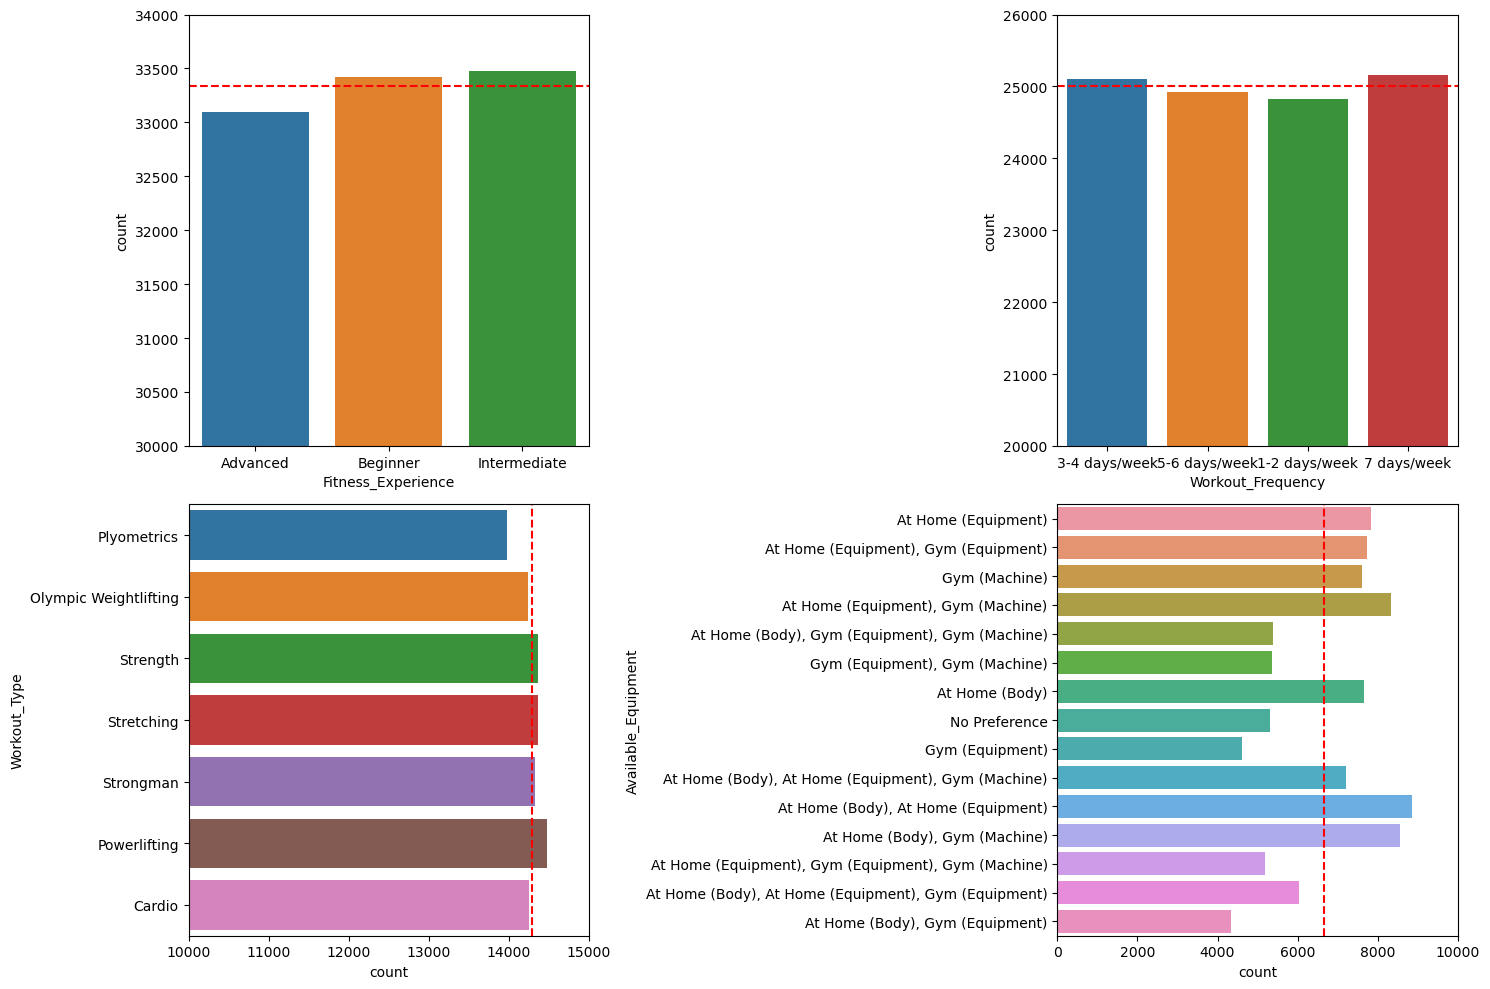

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Statistics
print("Basic Statistics of Generated Data:")
print(user_input_data.describe(include='all'))

# Check for any null values
print("\nChecking for Null Values:")
print(user_input_data.isnull().sum())

# Distribution of Fitness Experience Levels
print("\nDistribution of Fitness Experience Levels:")
print(user_input_data['Fitness_Experience'].value_counts())

# Distribution of Workout Frequency
print("\nDistribution of Workout Frequency:")
print(user_input_data['Workout_Frequency'].value_counts())

# Visual Analysis

xlim_values = {
    'Fitness_Experience': (30000, 34000),  # Example limits
    'Workout_Frequency': (20000, 26000),
    'Workout_Type': (10000, 15000),
    'Available_Equipment': (0, 10000)
}

# Plotting distributions of categorical data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(x='Fitness_Experience', data=user_input_data, ax=axes[0, 0])
axes[0, 0].set_ylim(xlim_values['Fitness_Experience'])
axes[0, 0].axhline(y=num_samples / len(fitness_experience_levels), color='r', linestyle='--', label='expected counts')

sns.countplot(x='Workout_Frequency', data=user_input_data, ax=axes[0, 1])
axes[0, 1].set_ylim(xlim_values['Workout_Frequency'])
axes[0, 1].axhline(y=num_samples / len(workout_frequency), color='r', linestyle='--', label='expected counts')

sns.countplot(y='Workout_Type', data=user_input_data, ax=axes[1, 0])
axes[1, 0].set_xlim(xlim_values['Workout_Type'])
axes[1, 0].axvline(x=num_samples / len(workout_type), color='r', linestyle='--', label='expected counts')

sns.countplot(y='Available_Equipment', data=user_input_data, ax=axes[1, 1])
axes[1, 1].set_xlim(xlim_values['Available_Equipment'])
axes[1, 1].axvline(x=num_samples / len((user_input_data['Available_Equipment'].value_counts())), color='r', linestyle='--', label='expected counts')

plt.tight_layout()
plt.show()

## Documentation

### Overview
This section of the notebook is dedicated to generating a mock dataset that simulates user inputs for a fitness-related application. The dataset aims to reflect a realistic range of user preferences in terms of fitness experience, desired muscle groups, workout frequency, workout type, and available equipment.

### Process
#### Defining Parameters

The first step involves defining a set of parameters that represent the various categories of user inputs. These parameters are:

Fitness Experience Levels: Categorized as 'Beginner', 'Intermediate', and 'Advanced'.

Muscle Groups: Including 'Chest', 'Back', 'Shoulders', 'Arms', 'Legs', 'Core', 'Glutes', and 'Neck'.

Workout Frequency: Options ranging from '1-2 days/week' to '7 days/week'.

Workout Type: Types like 'Cardio', 'Olympic Weightlifting', 'Plyometrics', etc.

Equipment: Including 'At Home (Body)', 'At Home (Equipment)', 'Gym (Machine)', and 'Gym (Equipment)'.
#### Data Synthesis
Using Python's random library, the script generates data within these defined categories. Two custom functions, random_muscle_groups and random_equipment, ensure a diverse and plausible selection of categories for each user profile.

#### Creating the Dataset

The script generates 100,000 user profiles, each with a unique combination of the defined parameters, resulting in a comprehensive and varied dataset.

### Validation and Analysis
#### Data Integrity Checks

The dataset is checked for null values to ensure completeness.
Basic statistics provide an overview of the distribution and variety in the data.

#### Distribution Analysis

Value counts for categories like 'Fitness Experience' and 'Workout Frequency' are analyzed to ensure a balanced representation of different user types.
The distribution of each parameter is visually inspected using bar plots and expected counts to identify any anomalies or biases.

### Conclusion
The generated mock user dataset successfully mimics a wide range of user preferences, providing a robust foundation for testing and validating the performance of the fitness application model. This comprehensive approach ensures that the model is trained and tested on data that closely resembles real-world scenarios, enhancing its reliability and effectiveness.